In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,auc

In [2]:
df_test = pd.read_csv('test_data.csv', index_col=False)
df_train = pd.read_csv('train_data.csv', index_col=False)
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [4]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
sample_submission.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [6]:
test = df_test.copy()

In [7]:
train = df_train.copy()
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [8]:
train.shape

(7160, 14)

In [9]:
test.shape

(3069, 13)

In [10]:
target = df_train['Claim']


In [11]:
train.drop('Claim', 1, inplace=True)

In [12]:
train.shape

(7160, 13)

In [13]:
combined = train.append(test)

In [14]:
combined

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN


In [15]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10229 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           10229 non-null object
YearOfObservation     10229 non-null int64
Insured_Period        10229 non-null float64
Residential           10229 non-null int64
Building_Painted      10229 non-null object
Building_Fenced       10229 non-null object
Garden                10218 non-null object
Settlement            10229 non-null object
Building Dimension    10110 non-null float64
Building_Type         10229 non-null int64
Date_of_Occupancy     8993 non-null float64
NumberOfWindows       10229 non-null object
Geo_Code              10114 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ MB


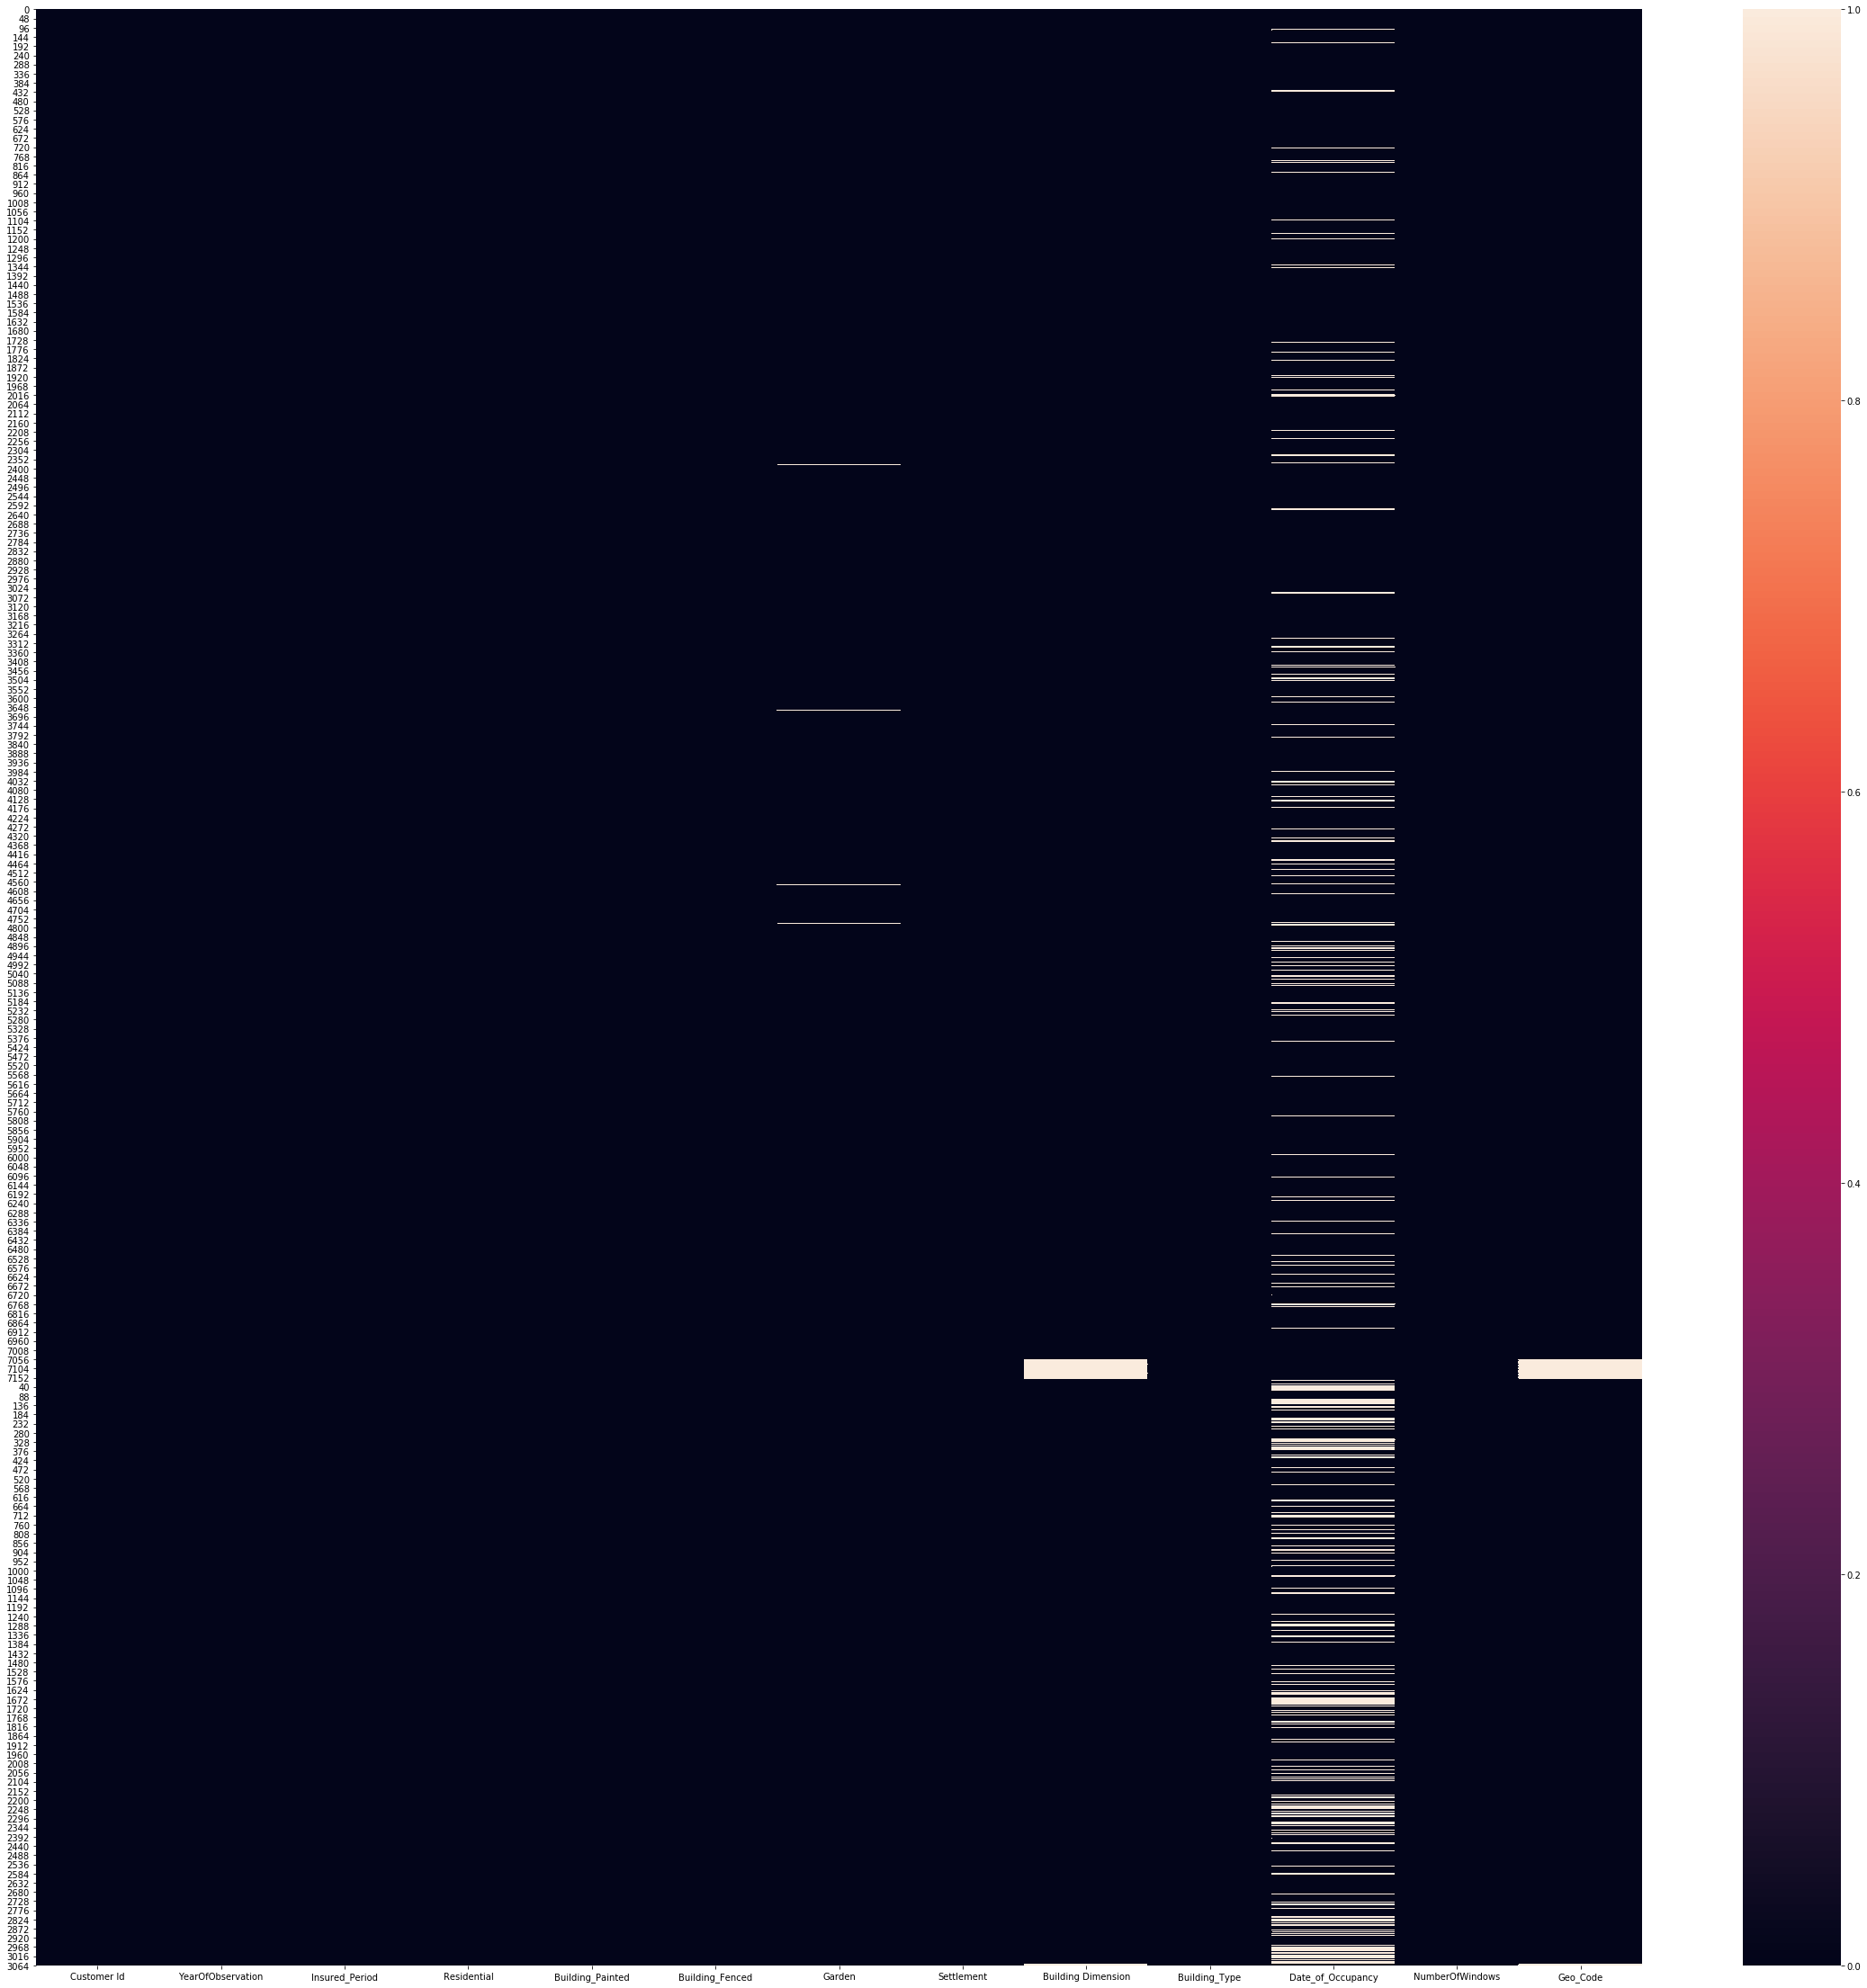

In [16]:
plt.figure(figsize=(40,40))
sns.heatmap(combined.isnull())

In [17]:
def get_isNull(data):
    null_features = []
    notNull_features = []
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            null_features.append(column)
        else:
            notNull_features.append(column)
    print('Features containing null values: {0}'.format(null_features), '/' )
    print('Features not containing null values: {0}'.format(notNull_features))
        

In [18]:
get_isNull(combined)

Features containing null values: ['Garden', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code'] /
Features not containing null values: ['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Settlement', 'Building_Type', 'NumberOfWindows']


In [19]:
def magnitude_null(data):
    objectResponse = [];
    numberResponse = [];
    for feature in ['Garden', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code']:
        if data[feature].dtypes == 'O':
            percentage = (data[feature].isnull().sum() / len(data[feature])) * 100
            objectResponse.append(percentage)
        else:
            percentage = (data[feature].isnull().sum() / len(data[feature])) * 100
            numberResponse.append(percentage)
    print( 'Object Dataframes result: {0}'.format(objectResponse) )
    print( 'Number Dataframes result: {0}'.format(numberResponse) )

In [20]:
magnitude_null(combined)

Object Dataframes result: [0.10753739368462216, 1.1242545703392317]
Number Dataframes result: [1.1633590771336397, 12.08329259947209]


In [21]:
combined['Garden'].value_counts()

V    5791
O    4427
Name: Garden, dtype: int64

In [22]:
combined['Garden'] = combined['Garden'].fillna( combined['Garden'].mode()[0])

In [23]:
combined['Building Dimension'] = combined['Building Dimension'].fillna( combined['Building Dimension'].mode()[0] ) 

In [24]:
combined['Date_of_Occupancy'] = combined['Date_of_Occupancy'].fillna( combined['Date_of_Occupancy'].mode()[0] )

In [25]:
combined['Geo_Code'] = combined['Geo_Code'].fillna( combined['Geo_Code'].mode()[0])

In [26]:
combined.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053


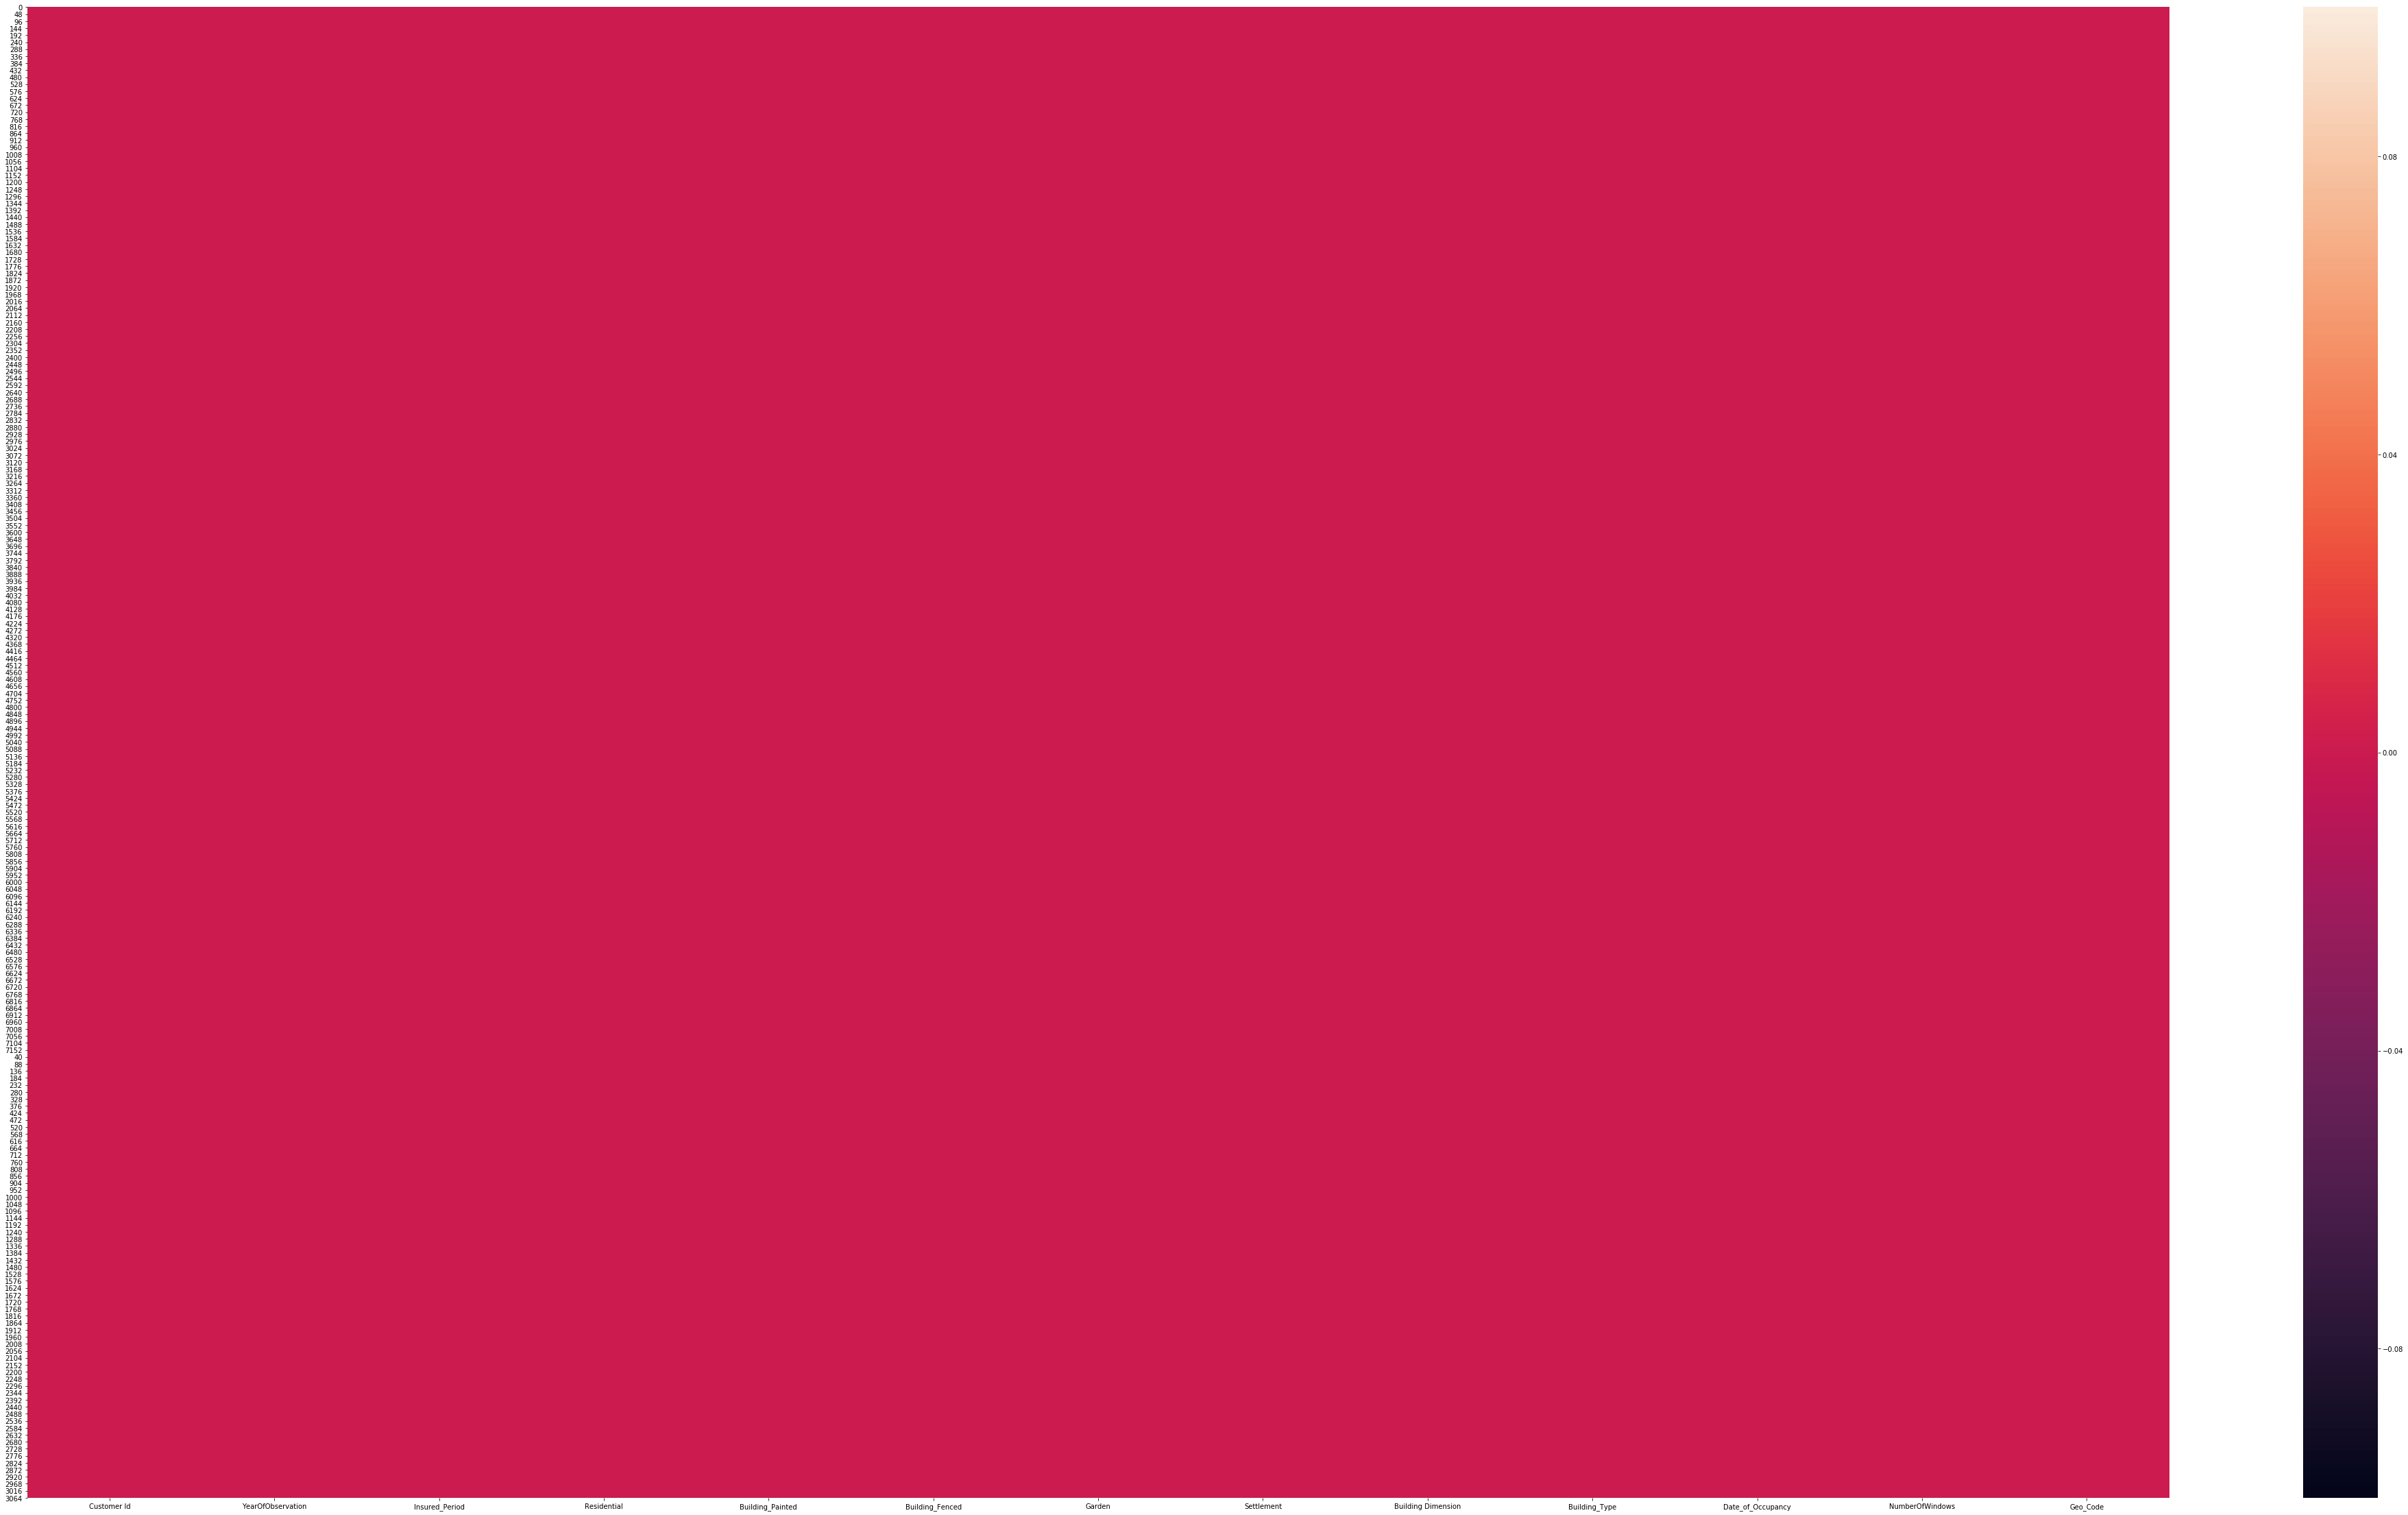

In [27]:
plt.figure(figsize=(70,40))
sns.heatmap(combined.isnull())

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10229 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           10229 non-null object
YearOfObservation     10229 non-null int64
Insured_Period        10229 non-null float64
Residential           10229 non-null int64
Building_Painted      10229 non-null object
Building_Fenced       10229 non-null object
Garden                10229 non-null object
Settlement            10229 non-null object
Building Dimension    10229 non-null float64
Building_Type         10229 non-null int64
Date_of_Occupancy     10229 non-null float64
NumberOfWindows       10229 non-null object
Geo_Code              10229 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ MB


In [29]:
combined.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053


In [30]:
customer_id = combined['Customer Id']

In [31]:
sc = StandardScaler()

In [32]:
oh = OneHotEncoder()

In [33]:
le = LabelEncoder()

In [34]:
df = combined.copy()

In [35]:
df.drop('Customer Id', 1, inplace=True)

In [36]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.0,0,V,V,V,U,400.0,4,1900.0,.,6088
3065,2012,1.0,0,V,V,V,U,400.0,2,1948.0,.,6088
3066,2012,1.0,0,V,V,V,U,400.0,2,1993.0,.,6088
3067,2013,1.0,0,V,V,V,U,400.0,1,1800.0,.,6088


In [37]:
df['Geo_Code'].unique()

array(['1053', '1143', '1160', ..., '2B037', '2B298', '2B309'],
      dtype=object)

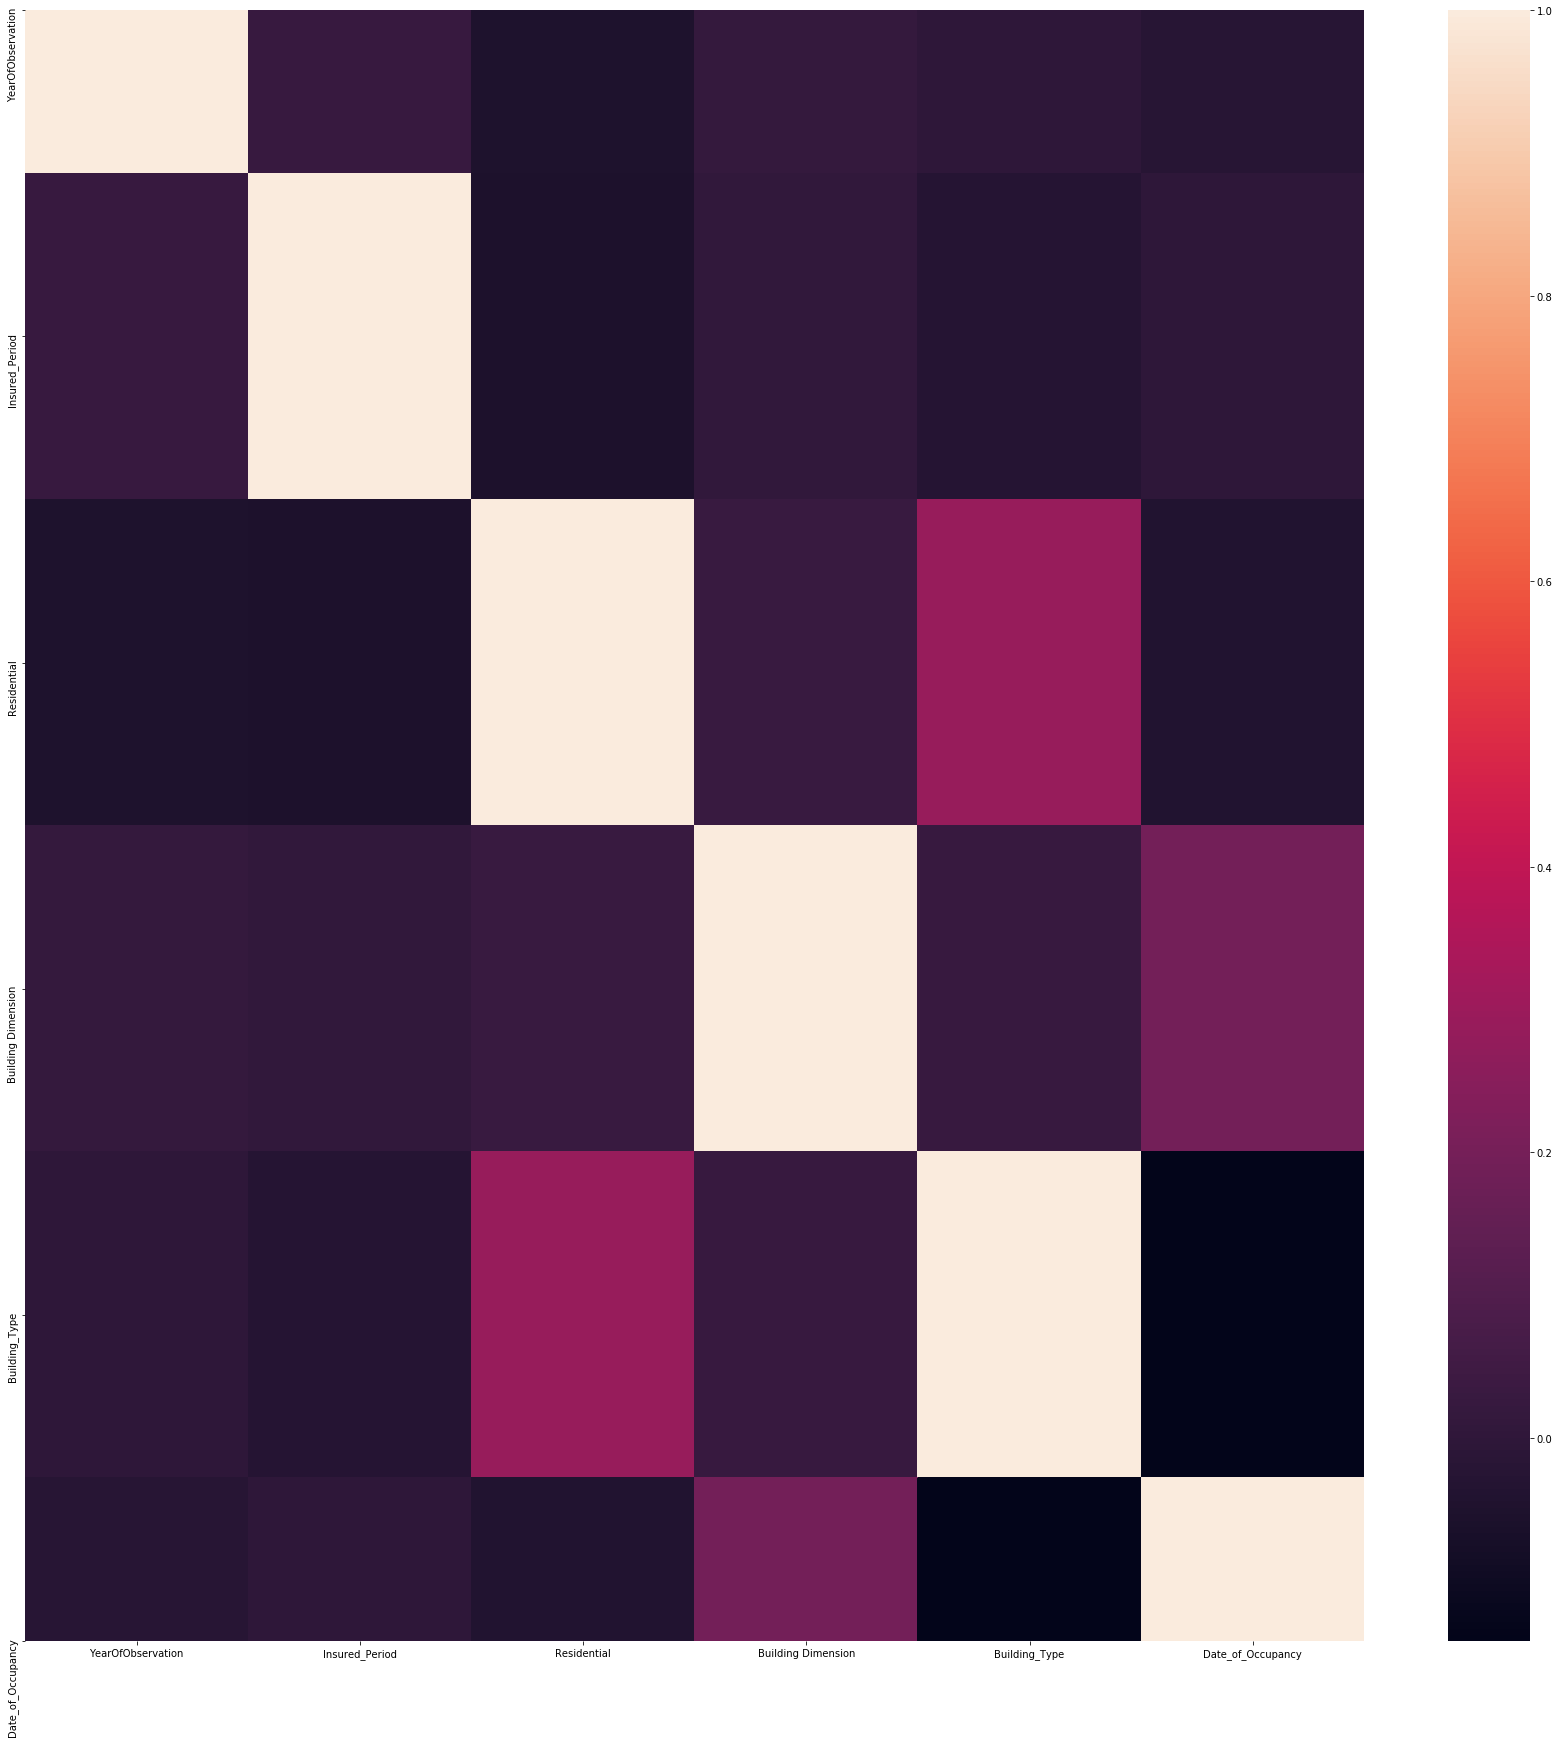

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr())

In [39]:
df.corr()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
YearOfObservation,1.000000,0.026359,-0.049702,0.014617,0.000373,-0.024167
Insured_Period,0.026359,1.000000,-0.056036,0.009163,-0.029292,0.000108
Residential,-0.049702,-0.056036,1.000000,0.029305,0.289646,-0.040067
Building Dimension,0.014617,0.009163,0.029305,1.000000,0.024927,0.193828
Building_Type,0.000373,-0.029292,0.289646,0.024927,1.000000,-0.142388
Date_of_Occupancy,-0.024167,0.000108,-0.040067,0.193828,-0.142388,1.000000


In [40]:
df['Garden'] = le.fit_transform(df['Garden'])

In [41]:
df['Building_Painted'] = le.fit_transform(df['Building_Painted'])

In [42]:
df['Building_Fenced'] = le.fit_transform(df['Building_Fenced'])

In [43]:
#df.loc[ df['NumberOfWindows'] == '   .' ]
df['NumberOfWindows'] = df['NumberOfWindows'].replace(to_replace='   .',value='0')

In [44]:
# filling those three with 1
df['NumberOfWindows'] = df['NumberOfWindows'].replace(to_replace=['0','3','4'],value=1)

In [45]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace(to_replace=['1','2', '5', '>=10', '6', '7', '9', '8'],value=0)

In [46]:
df['NumberOfWindows'].value_counts()

1    7995
0    2234
Name: NumberOfWindows, dtype: int64

In [47]:
df['Settlement'] = le.fit_transform(df['Settlement'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10229 entries, 0 to 3068
Data columns (total 12 columns):
YearOfObservation     10229 non-null int64
Insured_Period        10229 non-null float64
Residential           10229 non-null int64
Building_Painted      10229 non-null int32
Building_Fenced       10229 non-null int32
Garden                10229 non-null int32
Settlement            10229 non-null int32
Building Dimension    10229 non-null float64
Building_Type         10229 non-null int64
Date_of_Occupancy     10229 non-null float64
NumberOfWindows       10229 non-null int64
Geo_Code              10229 non-null object
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 879.1+ KB


In [49]:
df['Geo_Code'] = le.fit_transform(df['Geo_Code'])

In [50]:
lessThanMedian = df.loc[ df['Geo_Code'] <= df['Geo_Code'].median() ]['Geo_Code'].unique()

In [51]:
greaterThanMedian = df.loc[ df['Geo_Code'] >= df['Geo_Code'].median() ]['Geo_Code'].unique()

In [52]:
lessThanMedian

array([  7,  14,  16,  17,  27,  29,  50,  88,  97, 142, 159, 171, 201,
       263, 294, 307, 469, 470, 471, 473, 475, 476, 478, 479, 480, 554,
       557, 558, 559, 562, 564, 565, 567, 569, 571, 572, 575, 576, 577,
       691, 693, 694, 695, 697, 700, 703, 704, 705, 706, 707, 710, 711,
       712, 714, 716, 721, 723, 724, 725, 726, 727, 728,   0,   1,   2,
         3,   4,   5,   6,   8,   9,  10,  11,  12,  13,  15,  18,  20,
        21,  22,  23,  24,  25,  26,  28,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  90,  93,  94,
        95,  96,  98,  99, 100, 101, 103, 104, 105, 107, 108, 110, 111,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 128,
       129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 14

In [53]:
greaterThanMedian

array([ 728,  729,  730,  731,  732,  733,  737,  739,  740,  741,  742,
        743,  744,  746,  748,  749,  750,  751,  752,  753,  754,  755,
        756,  906,  912,  952,  953,  956,  962,  963,  966, 1001, 1014,
       1288, 1301, 1344, 1356, 1420, 1426,  735,  736,  738,  747,  758,
        760,  761,  762,  764,  765,  766,  767,  768,  769,  770,  772,
        774,  775,  779,  780,  781,  782,  783,  784,  785,  786,  787,
        788,  789,  790,  791,  792,  793,  794,  795,  797,  799,  800,
        801,  802,  803,  804,  805,  806,  808,  809,  810,  811,  812,
        813,  814,  815,  816,  817,  818,  819,  821,  822,  823,  824,
        825,  826,  827,  828,  829,  830,  831,  832,  833,  834,  836,
        837,  838,  839,  840,  841,  842,  843,  844,  845,  846,  847,
        848,  849,  850,  851,  854,  855,  856,  858,  859,  860,  861,
        862,  864,  865,  866,  867,  868,  869,  870,  871,  872,  873,
        875,  876,  877,  878,  879,  882,  883,  8

In [54]:
# fill all fields where the value is less than or equal than the median
df['Geo_Code'] = df['Geo_Code'].replace(to_replace=lessThanMedian,value=1)

In [55]:
# fill all fields where the value is greater than or equal the median
df['Date_of_Occupancy'].values

array([1960., 1850., 1960., ..., 1993., 1800., 1950.])

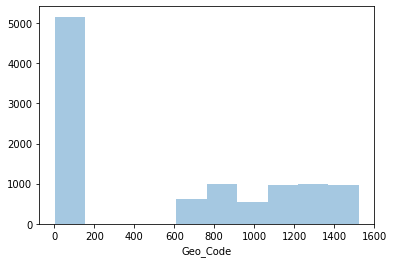

In [56]:
sns.distplot(df['Geo_Code'], kde=False, bins=10)

In [57]:
df['Geo_Code'].value_counts()

1       5153
731      353
788      132
1283     106
1311      84
        ... 
795        1
1046       1
835        1
851        1
1230       1
Name: Geo_Code, Length: 797, dtype: int64

In [58]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,1,1
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,1,1
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,1,1
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,1,1
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.0,0,1,1,1,1,400.0,4,1900.0,1,731
3065,2012,1.0,0,1,1,1,1,400.0,2,1948.0,1,731
3066,2012,1.0,0,1,1,1,1,400.0,2,1993.0,1,731
3067,2013,1.0,0,1,1,1,1,400.0,1,1800.0,1,731


In [59]:
df['Date_of_Occupancy'].describe()

count    10229.000000
mean      1964.450093
std         31.499523
min       1545.000000
25%       1960.000000
50%       1960.000000
75%       1980.000000
max       2016.000000
Name: Date_of_Occupancy, dtype: float64

In [60]:
len(df.loc[ df['Date_of_Occupancy'].values == 1960.0 ])

3868

In [61]:
binarizeToOne = df.loc[ df['Date_of_Occupancy'] >= 1960.0 ]['Date_of_Occupancy'].unique()
binarizeToZero = df.loc[ df['Date_of_Occupancy'] <= 1960.0 ]['Date_of_Occupancy'].unique()
print('Binarize to zero: {0}'.format(binarizeToZero))
print('Binarize to one: {0}'.format(binarizeToOne))

Binarize to zero: [1960. 1850. 1800. 1550. 1900. 1950. 1700. 1940. 1920. 1930. 1927. 1952.
 1957. 1890. 1949. 1951. 1956. 1912. 1954. 1936. 1958. 1953. 1946. 1955.
 1870. 1613. 1910. 1945. 1864. 1942. 1939. 1934. 1908. 1948. 1860. 1926.
 1938. 1895. 1545. 1959. 1840. 1718. 1600. 1875. 1898. 1880. 1915. 1810.
 1937. 1907. 1931. 1925. 1935. 1824. 1914. 1750. 1846. 1903. 1905. 1906.
 1830. 1923. 1924. 1928. 1947. 1911. 1901. 1902. 1904. 1919. 1896. 1913.
 1893. 1820. 1884. 1871. 1780. 1929. 1922. 1856. 1803. 1854. 1932.]
Binarize to one: [1960. 1980. 1988. 2013. 2011. 2007. 1970. 1976. 1982. 1972. 2010. 1971.
 1995. 2006. 1999. 1969. 1985. 1965. 1981. 1975. 1997. 2003. 1990. 1973.
 1991. 1974. 1978. 1967. 2009. 1977. 2008. 1987. 2000. 1962. 1993. 1983.
 1968. 2004. 1966. 1979. 2001. 1961. 2015. 1964. 1984. 2014. 2002. 1986.
 1992. 2005. 2012. 1998. 1989. 1996. 1963. 2016. 1994.]


In [62]:
df['Date_of_Occupancy'].mode()

0    1960.0
dtype: float64

In [63]:
# fill all fields where the value is less than or equal than the mode
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].replace(to_replace=binarizeToOne, value=1)

In [64]:
# fill all fields where the value is less than or equal than the mode
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].replace(to_replace=binarizeToZero,value=0)

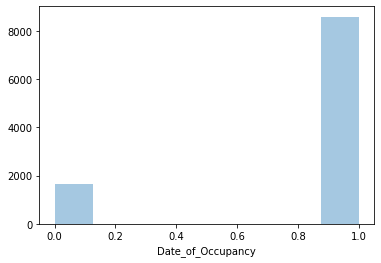

In [65]:
sns.distplot(df['Date_of_Occupancy'], kde=False, bins=8)

In [66]:
df['Date_of_Occupancy'].unique()

array([1., 0.])

In [67]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.0,0,0,1,1,1,290.0,1,1.0,1,1
1,2015,1.0,0,1,0,0,0,490.0,1,0.0,1,1
2,2014,1.0,0,0,1,1,1,595.0,1,1.0,1,1
3,2013,1.0,0,1,1,1,1,2840.0,1,1.0,1,1
4,2014,1.0,0,1,0,0,0,680.0,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.0,0,1,1,1,1,400.0,4,0.0,1,731
3065,2012,1.0,0,1,1,1,1,400.0,2,0.0,1,731
3066,2012,1.0,0,1,1,1,1,400.0,2,1.0,1,731
3067,2013,1.0,0,1,1,1,1,400.0,1,0.0,1,731


In [68]:
df['YearOfObservation'] = le.fit_transform(df['YearOfObservation'])

In [69]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,1,1.0,0,0,1,1,1,290.0,1,1.0,1,1
1,3,1.0,0,1,0,0,0,490.0,1,0.0,1,1
2,2,1.0,0,0,1,1,1,595.0,1,1.0,1,1
3,1,1.0,0,1,1,1,1,2840.0,1,1.0,1,1
4,2,1.0,0,1,0,0,0,680.0,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,3,1.0,0,1,1,1,1,400.0,4,0.0,1,731
3065,0,1.0,0,1,1,1,1,400.0,2,0.0,1,731
3066,0,1.0,0,1,1,1,1,400.0,2,1.0,1,731
3067,1,1.0,0,1,1,1,1,400.0,1,0.0,1,731


In [70]:
df['Building Dimension'] = sc.fit_transform(np.array(df['Building Dimension']).reshape(-1,1))

In [71]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,1,1.0,0,0,1,1,1,-0.667734,1,1.0,1,1
1,3,1.0,0,1,0,0,0,-0.579389,1,0.0,1,1
2,2,1.0,0,0,1,1,1,-0.533008,1,1.0,1,1
3,1,1.0,0,1,1,1,1,0.458662,1,1.0,1,1
4,2,1.0,0,1,0,0,0,-0.495462,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,3,1.0,0,1,1,1,1,-0.619144,4,0.0,1,731
3065,0,1.0,0,1,1,1,1,-0.619144,2,0.0,1,731
3066,0,1.0,0,1,1,1,1,-0.619144,2,1.0,1,731
3067,1,1.0,0,1,1,1,1,-0.619144,1,0.0,1,731


In [72]:
df['Building Dimension'].describe()

count    1.022900e+04
mean    -4.521643e-17
std      1.000049e+00
min     -7.953922e-01
25%     -5.749720e-01
50%     -3.541100e-01
75%      1.613817e-01
max      1.278497e+01
Name: Building Dimension, dtype: float64

In [73]:
training_data = df.iloc[:7160]

In [74]:
testing_date = df.iloc[7160:]

In [75]:
training_data.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,1,1.0,0,0,1,1,1,-0.667734,1,1.0,1,1
1,3,1.0,0,1,0,0,0,-0.579389,1,0.0,1,1
2,2,1.0,0,0,1,1,1,-0.533008,1,1.0,1,1
3,1,1.0,0,1,1,1,1,0.458662,1,1.0,1,1
4,2,1.0,0,1,0,0,0,-0.495462,1,0.0,1,1


In [76]:
# training_data['Claim'] = target

In [77]:
training_data.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [78]:
feat = ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code']
x = training_data[feat].values
y= target.values


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [80]:
import time

In [81]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=40)
start = time.time()
rf_model.fit(x_train, y_train.ravel())
stop = time.time()

training_time = stop -start

In [82]:
rf_predict_train = rf_model.predict(x_train)
print('Accuracy on training data: {0:.4f}%'.format(accuracy_score(y_train, rf_predict_train)*100))
print('Learning time: {0}s'.format(training_time))

Accuracy on training data: 99.0423%
Learning time: 0.3111722469329834s


In [83]:
rf_predict_test = rf_model.predict(x_test)
print('Accuracy on testing data: {0:.4f}%'.format(accuracy_score(y_test, rf_predict_test)*100))

# rf_model.score(x_test, y_test)

Accuracy on testing data: 75.8845%


In [84]:
folds = StratifiedKFold(n_splits=5)

In [85]:
folds

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [86]:
lr = LogisticRegression(C=0.7,random_state=42, solver='liblinear', max_iter=10000)
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42, n_estimators=40)

In [87]:
def train_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train.ravel())
    return model.score(x_test, y_test)

In [88]:
score_rf= []
score_lr = []
score_nb = []

prediction = []

for train_index, test_index in folds.split(x,y):
    x_train,x_test,y_train,y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    score_lr.append(train_score(lr, x_train,x_test,y_train,y_test))
    score_nb.append(train_score(nb, x_train,x_test,y_train,y_test))  
    score_rf.append(train_score(rf, x_train,x_test,y_train,y_test))
    prediction = lr.predict(testing_date)
    

In [89]:
(np.array(score_rf).mean()) * 100

71.12823537287348

In [90]:
(np.array(score_lr).mean()) * 100

78.49139158736709

In [91]:
(np.array(score_nb).mean()) * 100

76.95487365677727

In [92]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
testing_date

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,1,1.000000,0,1,0,0,0,-0.663317,1,1.0,1,1
1,4,0.997268,0,1,0,0,0,-0.663317,1,1.0,1,1
2,1,0.369863,0,1,1,1,1,-0.446872,1,1.0,1,1
3,2,1.000000,0,1,0,0,0,-0.175212,1,1.0,1,1
4,4,1.000000,0,1,0,0,0,-0.175212,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,3,1.000000,0,1,1,1,1,-0.619144,4,0.0,1,731
3065,0,1.000000,0,1,1,1,1,-0.619144,2,0.0,1,731
3066,0,1.000000,0,1,1,1,1,-0.619144,2,1.0,1,731
3067,1,1.000000,0,1,1,1,1,-0.619144,1,0.0,1,731


In [94]:
testing_date['Customer Id'] = df_test['Customer Id']

C:\Users\Hameed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
testing_date

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Customer Id
0,1,1.000000,0,1,0,0,0,-0.663317,1,1.0,1,1,H11920
1,4,0.997268,0,1,0,0,0,-0.663317,1,1.0,1,1,H11921
2,1,0.369863,0,1,1,1,1,-0.446872,1,1.0,1,1,H9805
3,2,1.000000,0,1,0,0,0,-0.175212,1,1.0,1,1,H7493
4,4,1.000000,0,1,0,0,0,-0.175212,1,1.0,1,1,H7494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,3,1.000000,0,1,1,1,1,-0.619144,4,0.0,1,731,H11583
3065,0,1.000000,0,1,1,1,1,-0.619144,2,0.0,1,731,H11720
3066,0,1.000000,0,1,1,1,1,-0.619144,2,1.0,1,731,H11721
3067,1,1.000000,0,1,1,1,1,-0.619144,1,0.0,1,731,H12408


In [97]:
testing_date.drop(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'], 1, inplace=True)

C:\Users\Hameed\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
testing_date['Claim'] = prediction

C:\Users\Hameed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
testing_date

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,0
3065,H11720,0
3066,H11721,0
3067,H12408,0


In [101]:
testing_date['Claim'].value_counts()

0    2916
1     153
Name: Claim, dtype: int64

In [102]:
testing_date.to_csv('firstsubmission.csv', index=False)